<a href="https://colab.research.google.com/github/BlackCurrantDS/DeepLearning/blob/main/IDL_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference- https://www.tensorflow.org/tutorials/generative/autoencoder

https://medium.com/nerd-for-tech/visualizing-feature-maps-and-filters-eb05fb91d675

https://github.com/meet-minimalist/Visualize-CNN-Filters/blob/master/Visualize%20CNN%20Layer%20Outputs%20and%20Filters.ipynb

Autoencoders in Tensorflow

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [4]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [5]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0392 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0122 - val_loss: 0.0105
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0102 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0090 - val_loss: 0.0092
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.008

In [6]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

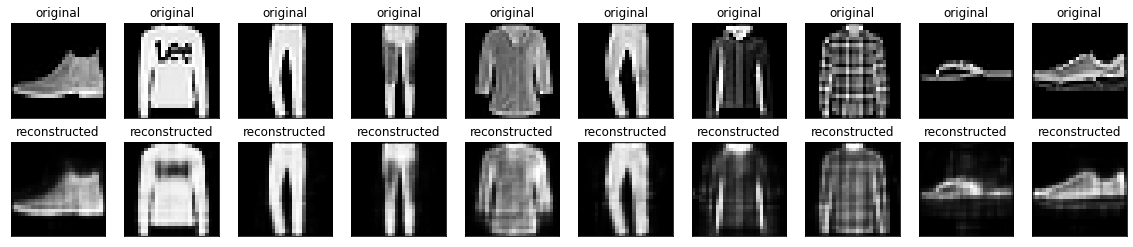

In [7]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Using relu

In [8]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='relu'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [9]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [10]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0380 - val_loss: 0.0193
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0188 - val_loss: 0.0178
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0175 - val_loss: 0.0176
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0173 - val_loss: 0.0174
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0172 - val_loss: 0.0172
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0171 - val_loss: 0.0171
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0171 - val_loss: 0.0170
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0168 - val_loss: 0.0169
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0167 - val_loss: 0.0168
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.016

In [11]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

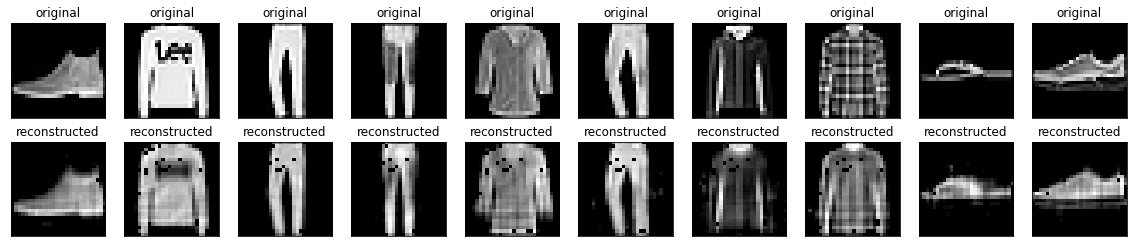

In [12]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Tanh Activation

In [13]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='tanh'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [14]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [15]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0349 - val_loss: 0.0149
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0144 - val_loss: 0.0136
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0135 - val_loss: 0.0132
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0130 - val_loss: 0.0129
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0128 - val_loss: 0.0128
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0126 - val_loss: 0.0125
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0125 - val_loss: 0.0125
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0124 - val_loss: 0.0124
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0124 - val_loss: 0.0125
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.012

In [16]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

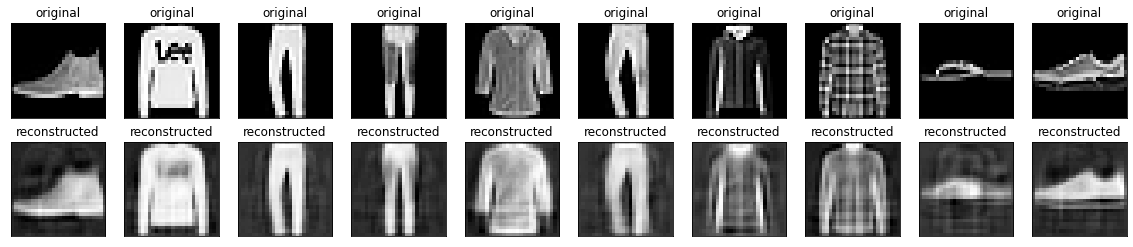

In [17]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

NO Activation

In [18]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [19]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [20]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0345 - val_loss: 0.0146
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0144 - val_loss: 0.0138
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0137 - val_loss: 0.0133
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0131 - val_loss: 0.0128
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0128 - val_loss: 0.0126
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0127 - val_loss: 0.0129
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0127 - val_loss: 0.0127
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0126 - val_loss: 0.0125
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0124 - val_loss: 0.0124
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.012

In [21]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

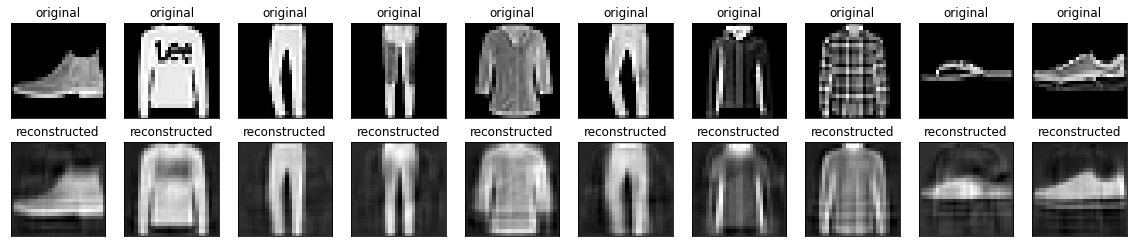

In [22]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Convolutional Autoencoders

In [23]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [24]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


In [25]:
class conv(Model):
  def __init__(self):
    super(conv, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)), 
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

aut_conv = conv()

In [26]:
aut_conv.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [27]:
aut_conv.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.0323 - val_loss: 0.0055
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0049 - val_loss: 0.0036
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.00

In [28]:
aut_conv.encoder.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [29]:
aut_conv.decoder.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


In [30]:
encoded_imgs = aut_conv.encoder(x_test).numpy()
decoded_imgs = aut_conv.decoder(encoded_imgs).numpy()

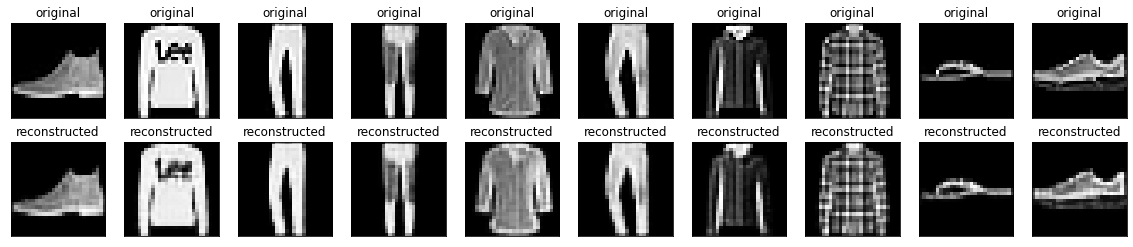

In [31]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

However, you need to take care when choosing padding/strides such that the output has the same dimensions as the input. This can be a problem with MNIST (why?). It also means that the last convolutional (transpose) layer should have as many filters as the input space (e.g. one filter for MNIST or three for CIFAR).

Beacasue output should be of same size of input. Needs upsampling.

Plotting filters

In [36]:
for layer in aut_conv.decoder.layers:
    print(layer.name)

conv2d_transpose
conv2d_transpose_1
conv2d_2


In [47]:
for layer in aut_conv.decoder.layers: 
  print(layer.get_config())

weights = aut_conv.decoder.get_weights()

{'name': 'conv2d_transpose', 'trainable': True, 'dtype': 'float32', 'filters': 8, 'kernel_size': (3, 3), 'strides': (2, 2), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None, 'output_padding': None}
{'name': 'conv2d_transpose_1', 'trainable': True, 'dtype': 'float32', 'filters': 16, 'kernel_size': (3, 3), 'strides': (2, 2), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': Non

In [51]:
layer_variables = aut_conv.decoder.get_layer('conv2d_2').get_weights()


In [52]:
weights = layer_variables[0]
biases = layer_variables[1]

w = np.array(weights)
w.shape

(3, 3, 16, 1)

In [53]:
w = np.moveaxis(w, 2, 0)
w = np.moveaxis(w, 3, 0)
print(w.shape)

(1, 16, 3, 3)


In [54]:
w.shape[1]

16

In [55]:
total_filters_in_prev_layers = 16

cols = 5
rows = 5

In [64]:
current_filter = 0

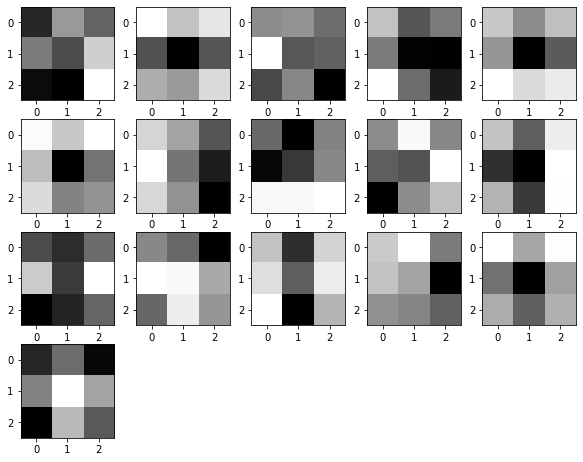

In [65]:
fig = plt.figure(figsize=(10, 10))

for each_depth in range(w.shape[1]):
    fig.add_subplot(rows, cols, each_depth+1)
    plt.imshow(w[current_filter][each_depth], cmap='gray')

TypeError: ignored

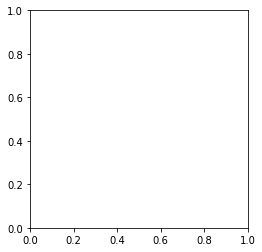

In [72]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = x_test[i]
#img2 = img.resize((28, 28,1))
plt.imshow(img)

img2 = np.array(img2)
img2 = np.reshape(img2, (1, img2.shape[0], img2.shape[1], img2.shape[2]))
print(img2.shape)
